In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
yf.pdr_override()

In [2]:
start='2010-01-01'
end='2023-03-31'

df=yf.download('AAPL',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200
2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700
2023-03-30,161.529999,162.470001,161.270004,162.360001,162.360001,49501700


In [4]:
df= df.drop(['Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800


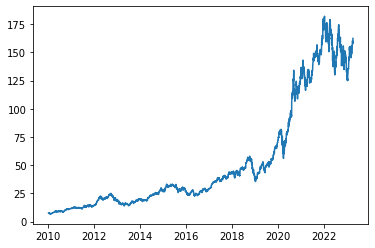

In [5]:
plt.plot(df.Close)

In [6]:
ma100=df.Close.rolling(100).mean()
ma100

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2023-03-24    144.556699
2023-03-27    144.606099
2023-03-28    144.676099
2023-03-29    144.833499
2023-03-30    145.068299
Name: Close, Length: 3333, dtype: float64

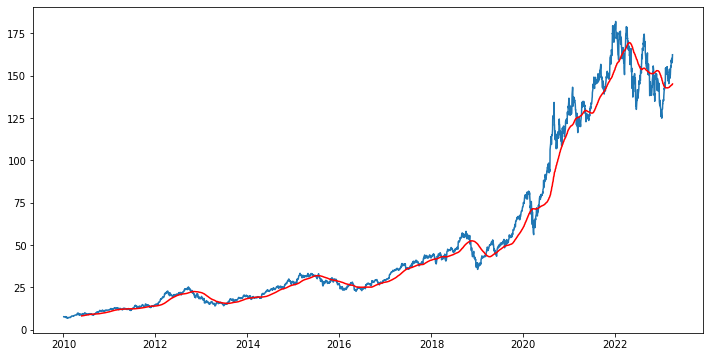

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [8]:
ma200=df.Close.rolling(200).mean()
ma200

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2023-03-24    147.940300
2023-03-27    147.991900
2023-03-28    148.066950
2023-03-29    148.185149
2023-03-30    148.337549
Name: Close, Length: 3333, dtype: float64

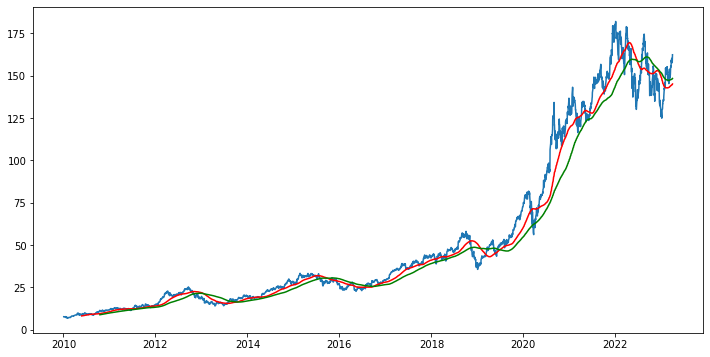

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [10]:
df.shape

(3333, 5)

In [11]:
# Splitting Data into Training and Testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2333, 1)
(1000, 1)


In [12]:
data_training.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [13]:
data_testing.head()

,Close
Date,
2019-04-11,49.737499
2019-04-12,49.717499
2019-04-15,49.807499
2019-04-16,49.812500
2019-04-17,50.782501


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.84377007],
       [0.84083798],
       [0.84631113]])

In [16]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train), np.array(y_train)

In [17]:
# ML Model

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model= Sequential()
model.add(LSTM(units=50, activation ='relu', return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation ='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation ='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
70/70 [==============================] - 31s 380ms/step - loss: 0.0300
Epoch 2/50
70/70 [==============================] - 20s 284ms/step - loss: 0.0065
Epoch 3/50
70/70 [==============================] - 20s 286ms/step - loss: 0.0054
Epoch 4/50
70/70 [==============================] - 20s 280ms/step - loss: 0.0055
Epoch 5/50
70/70 [==============================] - 19s 274ms/step - loss: 0.0049
Epoch 6/50
70/70 [==============================] - 19s 274ms/step - loss: 0.0049
Epoch 7/50
70/70 [==============================] - 19s 272ms/step - loss: 0.0044
Epoch 8/50
70/70 [==============================] - 19s 271ms/step - loss: 0.0046
Epoch 9/50
70/70 [==============================] - 19s 268ms/step - loss: 0.0039
Epoch 10/50
70/70 [==============================] - 19s 269ms/step - loss: 0.0038
Epoch 11/50
70/70 [==============================] - 19s 268ms/step - loss: 0.0038
Epoch 12/50
70/70 [==============================] - 19s 268ms/step - loss: 0.0036
Epoch 13/50
7

In [22]:
model.save('keras_model.h5')

In [23]:
data_testing.head()

,Close
Date,
2019-04-11,49.737499
2019-04-12,49.717499
2019-04-15,49.807499
2019-04-16,49.812500
2019-04-17,50.782501


In [24]:
past_100_days=data_training.tail(100)

In [25]:
final_df=pd.concat([past_100_days,data_testing], ignore_index=True)

In [26]:
final_df.head()

,Close
0,46.700001
1,47.852501
2,48.382500
3,46.465000
4,44.244999


In [27]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.07614578],
       [0.08401469],
       [0.08763335],
       ...,
       [0.83367755],
       [0.85498   ],
       [0.865836  ]])

In [28]:
input_data.shape

(1100, 1)

In [29]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [30]:
x_test, y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1000, 100, 1)
(1000,)


In [31]:
#Making Predictions

In [32]:
y_predicted=model.predict(x_test)

32/32 [==============================] - 3s 61ms/step


In [33]:
y_predicted.shape

(1000, 1)

In [34]:
y_test

array([0.09688486, 0.09674831, 0.0973628 , 0.09739694, 0.10401981,
       0.10526585, 0.10640949, 0.1114449 , 0.1108987 , 0.10768968,
       0.1060169 , 0.10654605, 0.09982077, 0.11663396, 0.11429546,
       0.11873346, 0.11315182, 0.10355893, 0.1036272 , 0.09990612,
       0.0938636 , 0.0743023 , 0.07932065, 0.08317828, 0.08174448,
       0.079901  , 0.06981308, 0.0758044 , 0.06928394, 0.06395836,
       0.06278058, 0.06151744, 0.06006658, 0.06163694, 0.05612359,
       0.05310233, 0.06392421, 0.06887427, 0.07344884, 0.08186395,
       0.08601178, 0.08981821, 0.08875993, 0.08869163, 0.08628489,
       0.08824784, 0.0960314 , 0.09504138, 0.09775541, 0.09659469,
       0.09625331, 0.09111549, 0.09833576, 0.09823335, 0.09512674,
       0.10132287, 0.10333702, 0.10620467, 0.10589741, 0.09871128,
       0.10079373, 0.10419049, 0.10166425, 0.10430998, 0.10757021,
       0.10635828, 0.10439533, 0.10833832, 0.10309806, 0.11100111,
       0.11376632, 0.11347614, 0.11065973, 0.11188872, 0.11520

In [35]:
y_predicted

array([[0.14263852],
       [0.14415395],
       [0.14567581],
       [0.14715244],
       [0.14854196],
       [0.14986372],
       [0.1511527 ],
       [0.15243913],
       [0.15377425],
       [0.15518273],
       [0.15663454],
       [0.15806705],
       [0.15942203],
       [0.16059688],
       [0.16165248],
       [0.1626543 ],
       [0.16368349],
       [0.16474664],
       [0.16573548],
       [0.16654213],
       [0.16706453],
       [0.16719948],
       [0.1667549 ],
       [0.16566221],
       [0.1639928 ],
       [0.16187915],
       [0.15946886],
       [0.15683313],
       [0.15408507],
       [0.15130037],
       [0.14850888],
       [0.14573756],
       [0.14301756],
       [0.14038002],
       [0.13787244],
       [0.13550642],
       [0.13326901],
       [0.13121967],
       [0.12944993],
       [0.12804493],
       [0.12709394],
       [0.12666315],
       [0.1267833 ],
       [0.12742558],
       [0.12851314],
       [0.12992871],
       [0.13155097],
       [0.133

In [36]:
scaler.scale_

array([0.00682769])

In [37]:
scale_factor=1/0.00682769
y_predicted=y_predicted * scale_factor
y_test=y_test*scale_factor

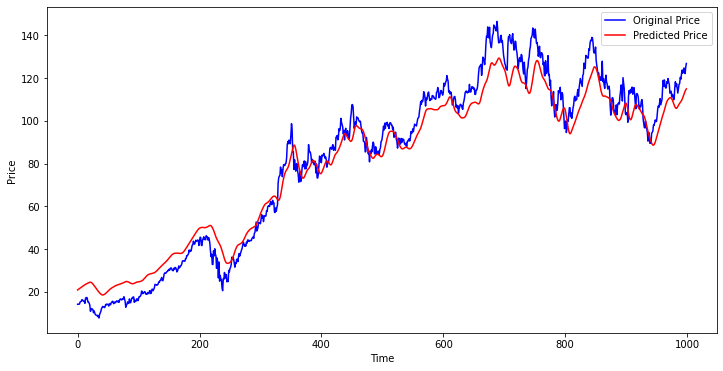

In [38]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()